In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import cmaps

from helpers import *


In [2]:
PATH_BT = '/home/orca/data/best_track/IBTrACS/'
PNG = '/home/disk/orca/adaley17/MLGEO2024_adaley/Project/Figures/'
track_file = 'ibtracs.NA.list.v04r00.csv'

df = pd.read_csv(PATH_BT + track_file)

<ipython-input-2-54e61a7417a5>:4: DtypeWarning: Columns (1,2,3,8,9,14,19,20,23,24,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH_BT + track_file)


In [3]:
df.index = pd.to_datetime(df['ISO_TIME'], errors='coerce')
df.head()

<ipython-input-3-656c4f92d310>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df['ISO_TIME'], errors='coerce')


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
ISO_TIME,,,,,,,,,,,,,,,,,,,,,
NaT,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1851-06-23 12:00:00,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,...,,,,,,,,,6,291
1851-06-23 15:00:00,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,...,,,,,,,,,6,290
1851-06-23 18:00:00,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,...,,,,,,,,,6,290
1851-06-23 21:00:00,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,...,,,,,,,,,6,290


## Isolate data from 1980 onwards and all the Named Storms

In [4]:
df_1980_onwards = df[df.index.year >= 1982] #identify the storms that occurred after 1980
# df_1980_onwards.head()

named_storms = df_1980_onwards[df_1980_onwards['NAME'] != 'NOT_NAMED'] #identify the named storms
named_storms.head()


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
ISO_TIME,,,,,,,,,,,,,,,,,,,,,
1982-06-02 12:00:00,1982154N22273,1982,33,NaN,GM,ALBERTO,1982-06-02 12:00:00,TS,21.7,-87.1,...,,,,,,,,,7,47
1982-06-02 15:00:00,1982154N22273,1982,33,NaN,GM,ALBERTO,1982-06-02 15:00:00,TS,21.9551,-86.8077,...,,,,,,,,,8,48
1982-06-02 18:00:00,1982154N22273,1982,33,NaN,GM,ALBERTO,1982-06-02 18:00:00,TS,22.2,-86.5,...,,,,,,,,,8,52
1982-06-02 21:00:00,1982154N22273,1982,33,NaN,GM,ALBERTO,1982-06-02 21:00:00,TS,22.4224,-86.165,...,,,,,,,,,8,58
1982-06-03 00:00:00,1982154N22273,1982,33,NaN,GM,ALBERTO,1982-06-03 00:00:00,TS,22.6,-85.8,...,,,,,,,,,8,68


In [5]:
columns_between = df.loc[:, 'LON':'BOM_GUST_PER'].columns
print(columns_between)

Index(['LON', 'WMO_WIND', 'WMO_PRES', 'WMO_AGENCY', 'TRACK_TYPE', 'DIST2LAND',
       'LANDFALL', 'IFLAG', 'USA_AGENCY', 'USA_ATCF_ID',
       ...
       'NEUMANN_WIND', 'NEUMANN_PRES', 'MLC_LAT', 'MLC_LON', 'MLC_CLASS',
       'MLC_WIND', 'MLC_PRES', 'USA_GUST', 'BOM_GUST', 'BOM_GUST_PER'],
      dtype='object', length=145)


In [6]:
for column in df.columns:
    print(column)

SID
SEASON
NUMBER
BASIN
SUBBASIN
NAME
ISO_TIME
NATURE
LAT
LON
WMO_WIND
WMO_PRES
WMO_AGENCY
TRACK_TYPE
DIST2LAND
LANDFALL
IFLAG
USA_AGENCY
USA_ATCF_ID
USA_LAT
USA_LON
USA_RECORD
USA_STATUS
USA_WIND
USA_PRES
USA_SSHS
USA_R34_NE
USA_R34_SE
USA_R34_SW
USA_R34_NW
USA_R50_NE
USA_R50_SE
USA_R50_SW
USA_R50_NW
USA_R64_NE
USA_R64_SE
USA_R64_SW
USA_R64_NW
USA_POCI
USA_ROCI
USA_RMW
USA_EYE
TOKYO_LAT
TOKYO_LON
TOKYO_GRADE
TOKYO_WIND
TOKYO_PRES
TOKYO_R50_DIR
TOKYO_R50_LONG
TOKYO_R50_SHORT
TOKYO_R30_DIR
TOKYO_R30_LONG
TOKYO_R30_SHORT
TOKYO_LAND
CMA_LAT
CMA_LON
CMA_CAT
CMA_WIND
CMA_PRES
HKO_LAT
HKO_LON
HKO_CAT
HKO_WIND
HKO_PRES
NEWDELHI_LAT
NEWDELHI_LON
NEWDELHI_GRADE
NEWDELHI_WIND
NEWDELHI_PRES
NEWDELHI_CI
NEWDELHI_DP
NEWDELHI_POCI
REUNION_LAT
REUNION_LON
REUNION_TYPE
REUNION_WIND
REUNION_PRES
REUNION_TNUM
REUNION_CI
REUNION_RMW
REUNION_R34_NE
REUNION_R34_SE
REUNION_R34_SW
REUNION_R34_NW
REUNION_R50_NE
REUNION_R50_SE
REUNION_R50_SW
REUNION_R50_NW
REUNION_R64_NE
REUNION_R64_SE
REUNION_R64_SW
REUNION_R

In [7]:
unique_names_count = named_storms['SID'].nunique()
print(f"Number of unique names: {unique_names_count}")


Number of unique names: 559


In [8]:
crs = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale='high', levels=[1,], edgecolor='k')
lakes = cfeature.GSHHSFeature(scale='high', levels=[2,], edgecolor='face',facecolor='grey')
borders = cfeature.BORDERS

#Track Domain
min_lat_track = 0
max_lat_track = 50
min_lon_track = -100
max_lon_track = -10


## Track Locations

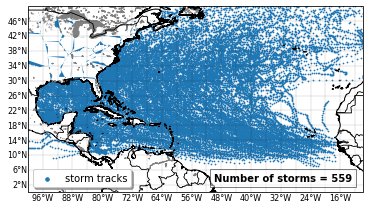

In [9]:
plot_area_track = [max_lon_track + 360.0, min_lon_track + 360.0, min_lat_track,max_lat_track]

gridsize = (1, 1)
fig = plt.figure(figsize=(6,6))

#Track
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=1, rowspan=1, projection=crs)

ax1.scatter(named_storms.LON.values, named_storms.LAT.values, marker='o', s=0.5, zorder=-100, label='storm tracks')
Cartopy_Features(ax1, 8, plot_area_track, 4, 4, 'k')

ax1.text(-50, 3, 'Number of storms = ' + str(unique_names_count), fontsize=10, color='black', 
         fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))

ax1.legend(loc='lower left', fontsize=10, markerscale=5,  frameon=True, fancybox=True, shadow=True)

plt.savefig(PNG + 'tracks.png', dpi=300, bbox_inches='tight',
                facecolor='w', transparent=False)

plt.show()


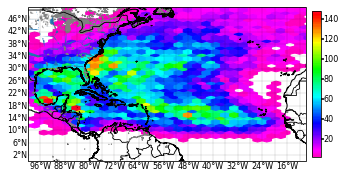

In [19]:
plot_area_track = [max_lon_track + 360.0, min_lon_track + 360.0, min_lat_track,max_lat_track]
shrink=0.45

aspect=18
width=0.5
length=4
labelsize=8

gridsize = (1, 1)
fig = plt.figure(figsize=(6,6))

ax1 = plt.subplot2grid(gridsize, (0,0), colspan=1, rowspan=1, projection=crs)

# track_density = ax1.hexbin(named_storms.LON.values, named_storms.LAT.values, gridsize=50, 
#                            cmap=cmaps.MPL_gist_rainbow_r, mincnt=1, extend='max')
track_density = ax1.hexbin(named_storms.LON.values, named_storms.LAT.values, gridsize=50, 
                                                   cmap=cmaps.MPL_gist_rainbow_r, mincnt=1)
Cartopy_Features(ax1, 8, plot_area_track, 4, 4, 'k')

hcb = fig.colorbar(track_density, shrink=shrink, aspect=aspect, ax=ax1, pad=0.02)
hcb.ax.tick_params(color='k', length=3, width=1.5, labelsize=labelsize, pad=0.002)

ISO_TIME
January        137
April          130
May            427
June          1523
July          2827
August        7944
September    13999
October       5845
November      2117
December       413
dtype: int64


<AxesSubplot:xlabel='ISO_TIME'>

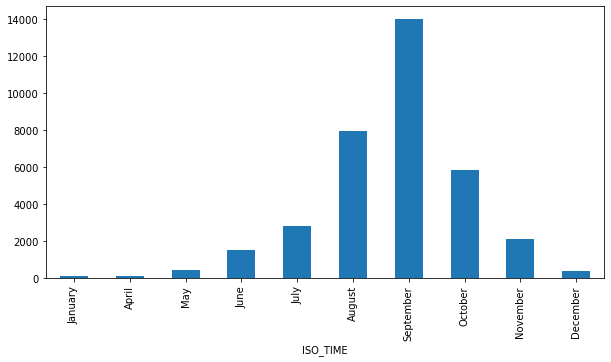

In [15]:
# Group storms by month
storms_by_month = named_storms.groupby(named_storms.index.month).size()

# Rename the index to month names for better readability
storms_by_month.index = storms_by_month.index.map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

print(storms_by_month)


storms_by_month.plot(kind='bar', figsize=(10,5))


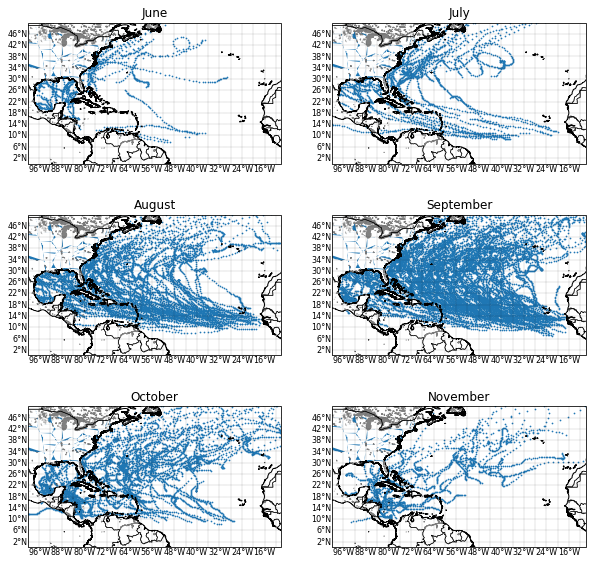

In [11]:
storms_june = named_storms[named_storms.index.month == 6]
storms_july = named_storms[named_storms.index.month == 7]
storms_august = named_storms[named_storms.index.month == 8]
storms_september = named_storms[named_storms.index.month == 9]
storms_october = named_storms[named_storms.index.month == 10]
storms_november = named_storms[named_storms.index.month == 11]

#Cartopy dependencies
crs = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale='high', levels=[1,], edgecolor='k')
lakes = cfeature.GSHHSFeature(scale='high', levels=[2,], edgecolor='face',facecolor='grey')
borders = cfeature.BORDERS

#Track Domain
min_lat_track = 0
max_lat_track = 50
min_lon_track = -100
max_lon_track = -10
plot_area_track = [max_lon_track + 360.0, min_lon_track + 360.0, min_lat_track,max_lat_track]

fontsize=12

gridsize = (3, 2)
fig = plt.figure(figsize=(10,10))

#June Tracks
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=1, rowspan=1, projection=crs)

ax1.scatter(storms_june.LON.values, storms_june.LAT.values, marker='o', s=0.5, zorder=-100)
Cartopy_Features(ax1, 8, plot_area_track, 4, 4, 'k')

ax1.set_title('June', fontsize=fontsize)

#July Tracks
ax2 = plt.subplot2grid(gridsize, (0,1), colspan=1, rowspan=1, projection=crs)

ax2.scatter(storms_july.LON.values, storms_july.LAT.values, marker='o', s=0.5, zorder=-100)
Cartopy_Features(ax2, 8, plot_area_track, 4, 4, 'k')

ax2.set_title('July', fontsize=fontsize)

#August Tracks
ax3 = plt.subplot2grid(gridsize, (1,0), colspan=1, rowspan=1, projection=crs)

ax3.scatter(storms_august.LON.values, storms_august.LAT.values, marker='o', s=0.5, zorder=-100)
Cartopy_Features(ax3, 8, plot_area_track, 4, 4, 'k')

ax3.set_title('August', fontsize=fontsize)

#September Tracks
ax4 = plt.subplot2grid(gridsize, (1,1), colspan=1, rowspan=1, projection=crs)

ax4.scatter(storms_september.LON.values, storms_september.LAT.values, marker='o', s=0.5, zorder=-100)
Cartopy_Features(ax4, 8, plot_area_track, 4, 4, 'k')

ax4.set_title('September', fontsize=fontsize)

#October Tracks
ax5 = plt.subplot2grid(gridsize, (2,0), colspan=1, rowspan=1, projection=crs)
ax5.scatter(storms_october.LON.values, storms_october.LAT.values, marker='o', s=0.5, zorder=-100)

Cartopy_Features(ax5, 8, plot_area_track, 4, 4, 'k')
ax5.set_title('October', fontsize=fontsize)

#November Tracks
ax6 = plt.subplot2grid(gridsize, (2,1), colspan=1, rowspan=1, projection=crs)
ax6.scatter(storms_november.LON.values, storms_november.LAT.values, marker='o', s=0.5, zorder=-100)

Cartopy_Features(ax6, 8, plot_area_track, 4, 4, 'k')
ax6.set_title('November', fontsize=fontsize)

plt.show()